In [55]:
import pandas as pd

In [56]:
df = pd.read_excel('GS1.xlsx')
df

,Year,Question
0,2023,Explain the role of geographical factors towar...
1,2023,What was the difference between Mahatma Gandhi...
2,2023,Bring out the socio-economic effects of the in...
3,2023,Discuss the consequences of climate change on ...
4,2023,Why is the world today confronted with a crisi...
...,...,...
230,2013,There is no formation of deltas by rivers on t...
231,2013,Do you agree that there is a growing trend of ...
232,2013,Analyze the factors for the highly decentraliz...
233,2013,"With growing scarcity of fossil fuels, the ato..."


In [57]:
text = df.Question[0]
print(text)

Explain the role of geographical factors towards the development of Ancient India.


In [58]:
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download stopwords from NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
import re
import string

def preprocess_text(text):
    """
    Preprocesses the given text by removing punctuation, extra spaces, converting to lowercase,
    and filtering out stopwords.
    
    Args:
        text (str): The text to be preprocessed.
    
    Returns:
        str: The preprocessed text.
    """
    # Load English stopwords
    text = text.lower()
    stop_words = set(stopwords.words('english'))

    # Add question words to the set of stopwords
    question_words = {'explain', 'what', 'when', 'where', 'who', 'whom', 'which', 'why', 'how', 
                        'comment', 'discuss', 'you', 'india', 'your', 'he', 's', 'his', 'government', 
                        'public', 'these', 'following', 'her', 'example', 'indian', 'ethical', 
                        'examine', 'state', 'critically', 'company', 'context', 'national', 'security', 
                        'country', 'measures', 'act', 'him', 'role', 'she', 'management', 'being', 
                        'issues', 'taken', 'suggest', 'social', 'options', 'civil', 'system', 'people', 
                        'had', 'case', 'situation', 'human', 'recent', 'give', 'life', 'help', 'does', 
                        'various'}
    stop_words.update(question_words)

    text = text.translate(str.maketrans(' ', ' ', string.punctuation))
    
    text = re.sub(r'[^\w\s]', ' ', text)

    # Remove extra spaces
    text = re.sub(r' +', ' ', text)

    # Tokenize the text to filter out stopwords
    tokens = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

text = df.Question[0]
filtered_text = preprocess_text(text)
print(filtered_text)

geographical factor towards development ancient


In [60]:
# df['processed_questions'] = df['Question'].apply(preprocess_text)

In [61]:
df.head(3)

,Year,Question
0,2023,Explain the role of geographical factors towar...
1,2023,What was the difference between Mahatma Gandhi...
2,2023,Bring out the socio-economic effects of the in...


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [63]:
questions = df['Question'].values.astype('U')

In [64]:
#TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(questions)

In [65]:
tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1477 stored elements and shape (235, 355)>

In [66]:
#Topic Modeling with NMF
nmf_model = NMF(n_components=10,random_state=1)
nmf_topic = nmf_model.fit_transform(tfidf)


In [67]:
# Displaying Topic
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print('\n')

Topic #0:
india colonial century women economic mid eighteenth examine british did


Topic #1:
indian society culture art early religion heritage changes main cultural


Topic #2:
discuss impact characteristics agree post understand india growing mining literature


Topic #3:
does affect global climate impact examples understand weather process place


Topic #4:
explain role development gandhara factors ancient islands formation strategies core


Topic #5:
world crisis areas bring evaluate resources modern wars critically different


Topic #6:
identity caste cultural work movements india national labour local global


Topic #7:
significance mention international evolution art architecture present times comment industrial


Topic #8:
water resources effective india urban examine land differ critically scarcity


Topic #9:
mahatma gandhi movement approach freedom struggle education highlight despite elucidate




In [15]:
# keywords manually by person - 20-25 words 
# 

In [68]:
from bertopic import BERTopic

In [69]:
from bertopic.representation import KeyBERTInspired
representation = KeyBERTInspired()
topic_model = BERTopic(min_topic_size=4,nr_topics='auto',calculate_probabilities=True,representation_model=representation)

In [70]:
topics,prob = topic_model.fit_transform(questions)

In [71]:
embeddings = topic_model._extract_embeddings(questions,verbose=True)

Batches: 100%|██████████| 8/8 [00:01<00:00,  4.91it/s]


In [72]:
embeddings[1,:5]

array([ 4.3002889e-03,  7.1556121e-02, -1.3235645e-01, -3.9236485e-05,
        5.9257936e-02], dtype=float32)

In [73]:
embeddings.shape

(235, 384)

In [52]:
# from sentence_transformers import SentenceTransformer
# model_name = 'all-MiniLM-L6-v2'
# model = SentenceTransformer(model_name)
# embedding = model.encode(questions)

In [53]:
# embedding.shape

(235, 384)

In [54]:
# embedding[1,:5]

array([ 0.00927396,  0.06967263, -0.09419183, -0.01517249,  0.08915012],
      dtype=float32)

In [74]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,55,-1_colonial_indian_tribals_india,"[colonial, indian, tribals, india, revolution,...",[Why are the tribals in India referred to as '...
1,0,39,0_meteorology_glaciers_climate_landslides,"[meteorology, glaciers, climate, landslides, h...",[What do you understand by the phenomenon of ‘...
2,1,33,1_india_poverty_socioeconomic_economic,"[india, poverty, socioeconomic, economic, urba...",[It is said that India has substantial reserve...
3,2,19,2_monuments_mythology_sculptures_gandhara,"[monuments, mythology, sculptures, gandhara, i...",[Mesolithic rock cut architecture of India not...
4,3,14,3_castes_feminization_women_indian,"[castes, feminization, women, indian, gender, ...",[‘Women’s movement in India has not addressed ...
5,4,14,4_caste_cultural_indian_diversity,"[caste, cultural, indian, diversity, ethnic, i...",[Has caste lost its relevance in understanding...
6,5,13,5_irrigation_freshwater_droughts_conservation,"[irrigation, freshwater, droughts, conservatio...",[what are the environmental implications of th...
7,6,12,6_secularism_hindu_religiousnessreligiosity_bu...,"[secularism, hindu, religiousnessreligiosity, ...","[Are tolerance, assimilation and pluralism the..."
8,7,11,7_1857_rebellions_colonial_labour,"[1857, rebellions, colonial, labour, colonies,...",[Why indentured labour was taken by the Britis...
9,8,11,8_revolution_revolutions_mercantilism_ideological,"[revolution, revolutions, mercantilism, ideolo...",[Analyze the circumstances that led to the Tas...


In [75]:
data =  topic_model.get_topic_info();
data['Count']

0     55
1     39
2     33
3     19
4     14
5     14
6     13
7     12
8     11
9     11
10     9
11     5
Name: Count, dtype: int64

In [76]:
topics[:5]

[1, 9, 1, 0, 5]

In [77]:
topic_str = topic_model.get_topic_info(0)['Name'].iloc[0]
topic_str.split('_')
' '.join(topic_str.split('_')[1:])


'meteorology glaciers climate landslides'

In [78]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,55,-1_colonial_indian_tribals_india,"[colonial, indian, tribals, india, revolution,...",[Why are the tribals in India referred to as '...
1,0,39,0_meteorology_glaciers_climate_landslides,"[meteorology, glaciers, climate, landslides, h...",[What do you understand by the phenomenon of ‘...
2,1,33,1_india_poverty_socioeconomic_economic,"[india, poverty, socioeconomic, economic, urba...",[It is said that India has substantial reserve...
3,2,19,2_monuments_mythology_sculptures_gandhara,"[monuments, mythology, sculptures, gandhara, i...",[Mesolithic rock cut architecture of India not...
4,3,14,3_castes_feminization_women_indian,"[castes, feminization, women, indian, gender, ...",[‘Women’s movement in India has not addressed ...
5,4,14,4_caste_cultural_indian_diversity,"[caste, cultural, indian, diversity, ethnic, i...",[Has caste lost its relevance in understanding...
6,5,13,5_irrigation_freshwater_droughts_conservation,"[irrigation, freshwater, droughts, conservatio...",[what are the environmental implications of th...
7,6,12,6_secularism_hindu_religiousnessreligiosity_bu...,"[secularism, hindu, religiousnessreligiosity, ...","[Are tolerance, assimilation and pluralism the..."
8,7,11,7_1857_rebellions_colonial_labour,"[1857, rebellions, colonial, labour, colonies,...",[Why indentured labour was taken by the Britis...
9,8,11,8_revolution_revolutions_mercantilism_ideological,"[revolution, revolutions, mercantilism, ideolo...",[Analyze the circumstances that led to the Tas...


In [79]:
topic_model.visualize_topics()

In [80]:
topic_model.visualize_documents(df['Question'])

In [81]:
print(topics)

[1, 9, 1, 0, 5, 0, 0, 6, 3, -1, 6, -1, -1, 10, 10, 1, 1, 1, 4, 4, 2, 7, -1, 0, 0, 10, 1, -1, -1, 4, -1, 2, 2, 0, -1, -1, 0, 6, 6, 1, -1, 6, -1, 0, 1, 5, 0, -1, 4, 3, -1, 9, 8, 0, 0, -1, 1, 1, -1, -1, 2, 6, 8, 0, 0, 0, 1, 4, 1, -1, 2, 2, 8, 5, 5, 1, 10, 4, -1, 1, 2, 7, -1, 0, 0, 1, 1, -1, 3, 6, 9, 8, 8, 5, -1, 1, 0, 4, 3, 4, 2, 2, 9, -1, -1, 0, 0, 4, 1, 6, -1, -1, 7, 5, 1, 1, 1, 3, 4, -1, 2, 7, -1, -1, 0, -1, -1, 0, 4, -1, 6, -1, 7, 0, -1, 5, 0, 3, 6, 1, 2, 2, 7, 3, 9, 4, 8, -1, -1, -1, 1, -1, 0, 0, 5, -1, 5, 5, 5, 5, 4, 2, 9, 9, 9, -1, 8, 4, 1, 3, 1, 3, -1, 0, -1, 5, 10, 0, 1, -1, 1, 2, 2, 7, 6, 7, 7, -1, -1, -1, 3, 3, -1, 3, 6, 0, 0, 0, 0, 0, -1, -1, -1, -1, 1, 2, 2, 2, 3, 7, 2, -1, 9, 7, 8, -1, -1, 8, 8, 8, 1, 3, -1, -1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


In [82]:
df['Topic_Number'] = topics

In [84]:
df.sample(5)

,Year,Question,Topic_Number
65,2020,How will the melting of Himalayan glaciers hav...,0
41,2021,Trace the rise and growth of socio-religious r...,6
116,2018,Mention core strategies for the transformation...,1
45,2021,what are the environmental implications of the...,5
196,2014,Why are the world’s fold mountain systems loca...,0


In [85]:

df['Topic'] = df['Topic_Number'].apply(lambda x: " ".join(topic_model.get_topic_info(topic=x)['Name'].iloc[0].split('_')[1:]))

# Display the first few rows of the DataFrame
df.head()

,Year,Question,Topic_Number,Topic
0,2023,Explain the role of geographical factors towar...,1,india poverty socioeconomic economic
1,2023,What was the difference between Mahatma Gandhi...,9,gandhi gandhian mahatma rabindranath
2,2023,Bring out the socio-economic effects of the in...,1,india poverty socioeconomic economic
3,2023,Discuss the consequences of climate change on ...,0,meteorology glaciers climate landslides
4,2023,Why is the world today confronted with a crisi...,5,irrigation freshwater droughts conservation


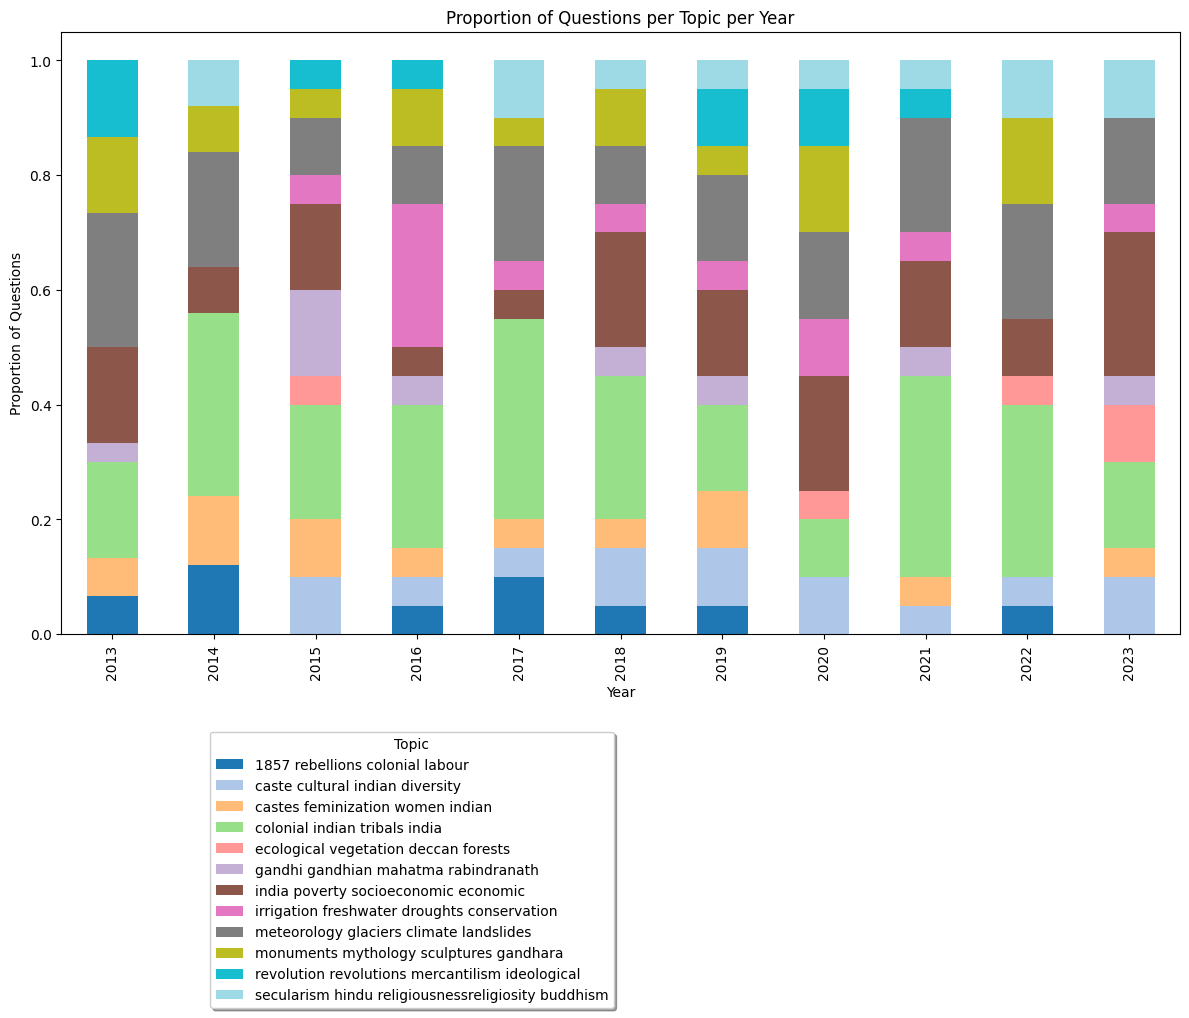

In [86]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming df is your DataFrame and it now includes a 'Topic' column after categorization

# Step 2: Count questions per topic per year
topic_year_counts = df.groupby(['Year', 'Topic']).size().reset_index(name='Count')

# Calculate the total number of questions per year
total_questions_per_year = topic_year_counts.groupby('Year')['Count'].transform('sum')

# Calculate the proportion of questions per topic per year
topic_year_counts['Proportion'] = topic_year_counts['Count'] / total_questions_per_year

# Step 3: Prepare data for plotting (normalized)
pivot_table = topic_year_counts.pivot(index='Year', columns='Topic', values='Proportion')

# Generate a list of colors from a colormap
num_topics = len(pivot_table.columns)
colors = plt.get_cmap('tab20', num_topics)

# Step 4: Plot the normalized data with different colors for each topic
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors(i) for i in range(num_topics)])

# Step 5: Customize the plot
plt.xlabel('Year')
plt.ylabel('Proportion of Questions')
plt.title('Proportion of Questions per Topic per Year')
plt.legend(title='Topic', loc='best', bbox_to_anchor=(0.5, -0.15), ncol=1, fancybox=True, shadow=True)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()